# DAUP ASSIGNMENT ISB Co'24 AMPBA¶
By Sudeshna Kundu, PGID : 12310045

QUESTION 5 Solution

In [1]:
#!pip install seaborn     ----> installed seaborn
#!pip install stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from decimal import Decimal
from scipy import stats
from scipy.stats import norm
import statistics
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path_file = r"./Indian_cities.csv"
df = pd.read_csv(path_file)
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [3]:
print(df.describe())
print("=================================================")
print(df.shape)
print("The count of rows is", df.shape[0])
print("The count of columns is", df.shape[1])
print("=================================================")
datatypes = df.dtypes
print(datatypes)
df.info()

       state_code   dist_code  population_total  population_male  \
count  493.000000  493.000000      4.930000e+02     4.930000e+02   
mean    18.643002   16.782961      4.481124e+05     2.343468e+05   
std      9.297168   15.566131      1.033228e+06     5.487786e+05   
min      1.000000    1.000000      1.000360e+05     5.020100e+04   
25%      9.000000    7.000000      1.261420e+05     6.638400e+04   
50%     19.000000   13.000000      1.841330e+05     9.665500e+04   
75%     27.000000   21.000000      3.490330e+05     1.750550e+05   
max     35.000000   99.000000      1.247845e+07     6.736815e+06   

       population_female  0-6_population_total  0-6_population_male  \
count       4.930000e+02          4.930000e+02           493.000000   
mean        2.137656e+05          4.709285e+04         24849.527383   
std         4.848622e+05          1.050279e+05         55535.310272   
min         4.512600e+04          6.547000e+03          3406.000000   
25%         6.041100e+04        

As we can see , there are neither null values nor any missing fields


Questions during Analysis:
    1. What is the state with highest population , 
       show a stacked bar graph distribution
    2. Scatterplot for population vs sex-ratio in a state, to check the relation
    3. Child sex ratio distribution
    4. How is effective literacy rate related to total graduates% (who gets graduated more male vs female)
    5. In which state has most colleges
    6. Which district has more colleges 
    

In [4]:
df1 = df[
    ['state_name','population_total','population_male','population_female']
         ].groupby(["state_name"]).sum().reset_index().sort_values(['population_total'], ascending=False)
                                                            # To group the population by state and sort in descending order
df1.index.name = 'index'
var1 = df1.iloc[0]['state_name']                            # To get the name of state which has highest population 
print("The name of state which has highest population :", var1)
df1.sort_values(['population_total'], ascending=False).head()



The name of state which has highest population : MAHARASHTRA


,state_name,population_total,population_male,population_female
index,,,,
14,MAHARASHTRA,37722136,19961736,17760400
26,UTTAR PRADESH,25302925,13433369,11869556
1,ANDHRA PRADESH,18171615,9192368,8979247
28,WEST BENGAL,18063509,9357777,8705732
6,GUJARAT,17835049,9541688,8293361


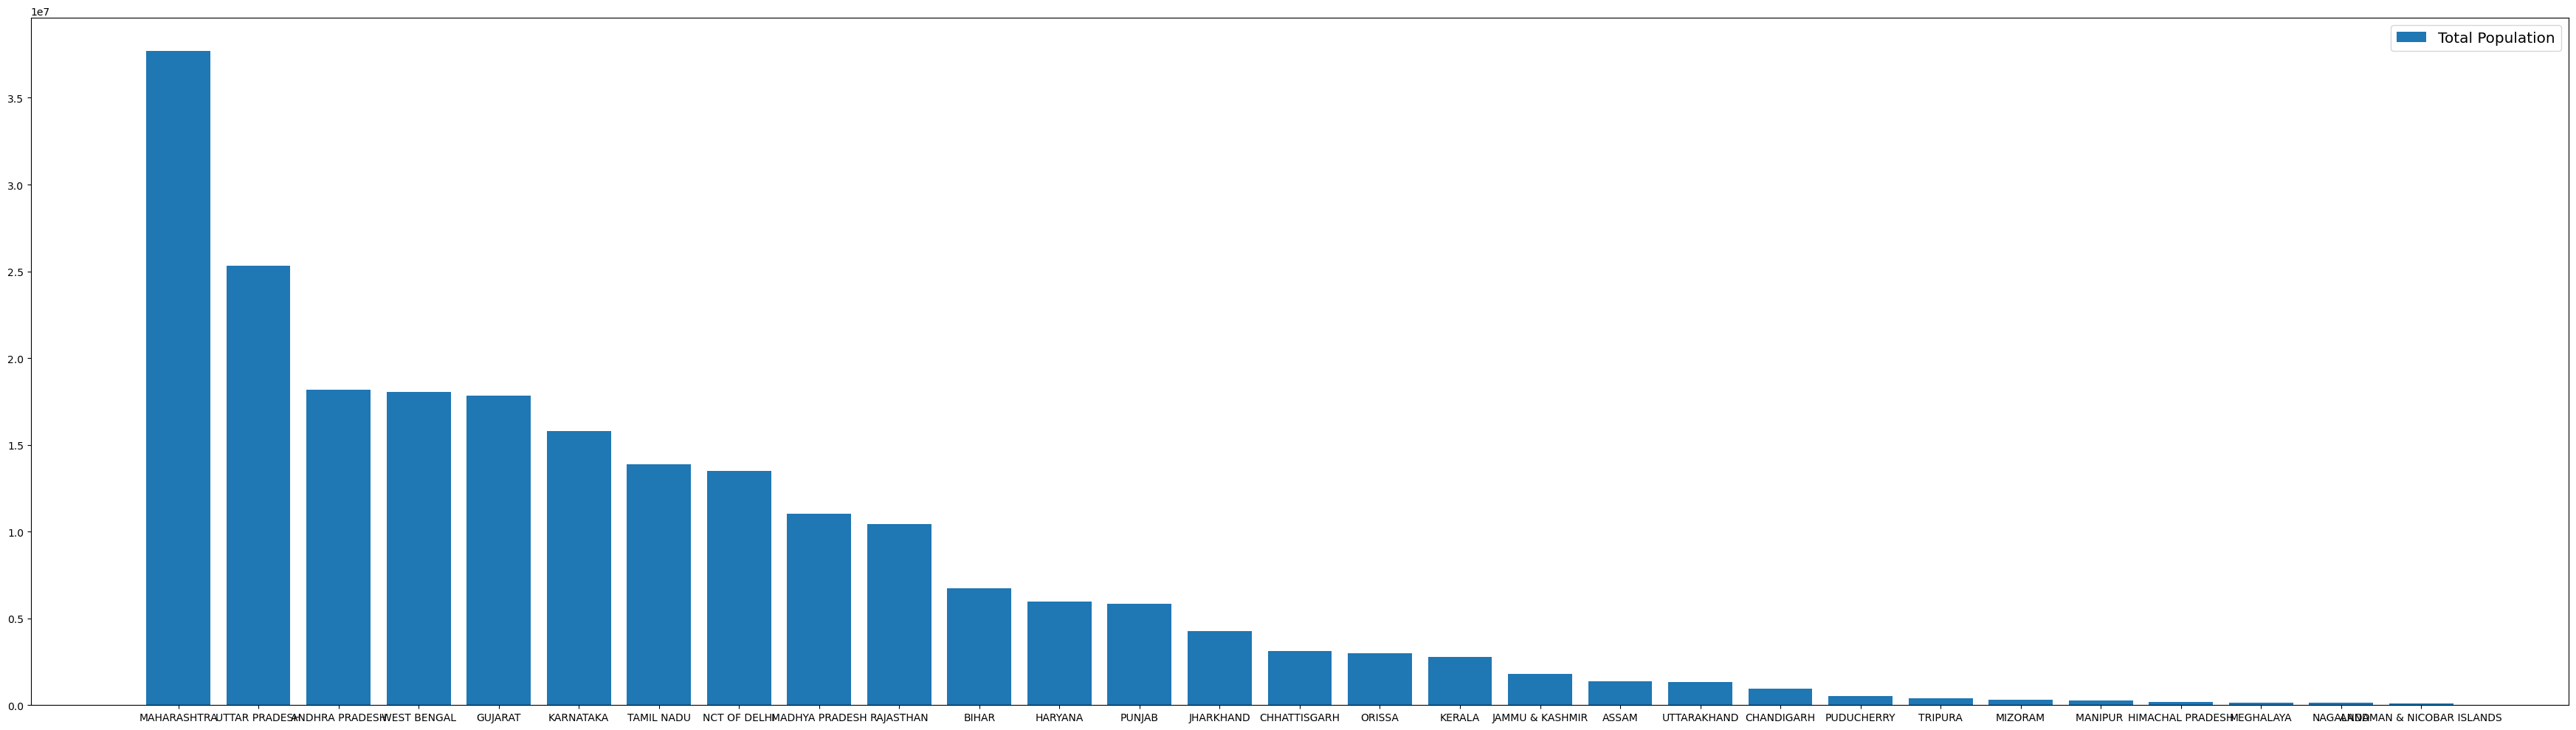

In [5]:
fig, ax = plt.subplots(figsize=(35, 10))
rects1 = ax.bar(df1.state_name, df1['population_total'], label='Total Population')
ax.legend(fontsize=40) 
ax.legend(fontsize="x-large")
fig.tight_layout()
plt.show()


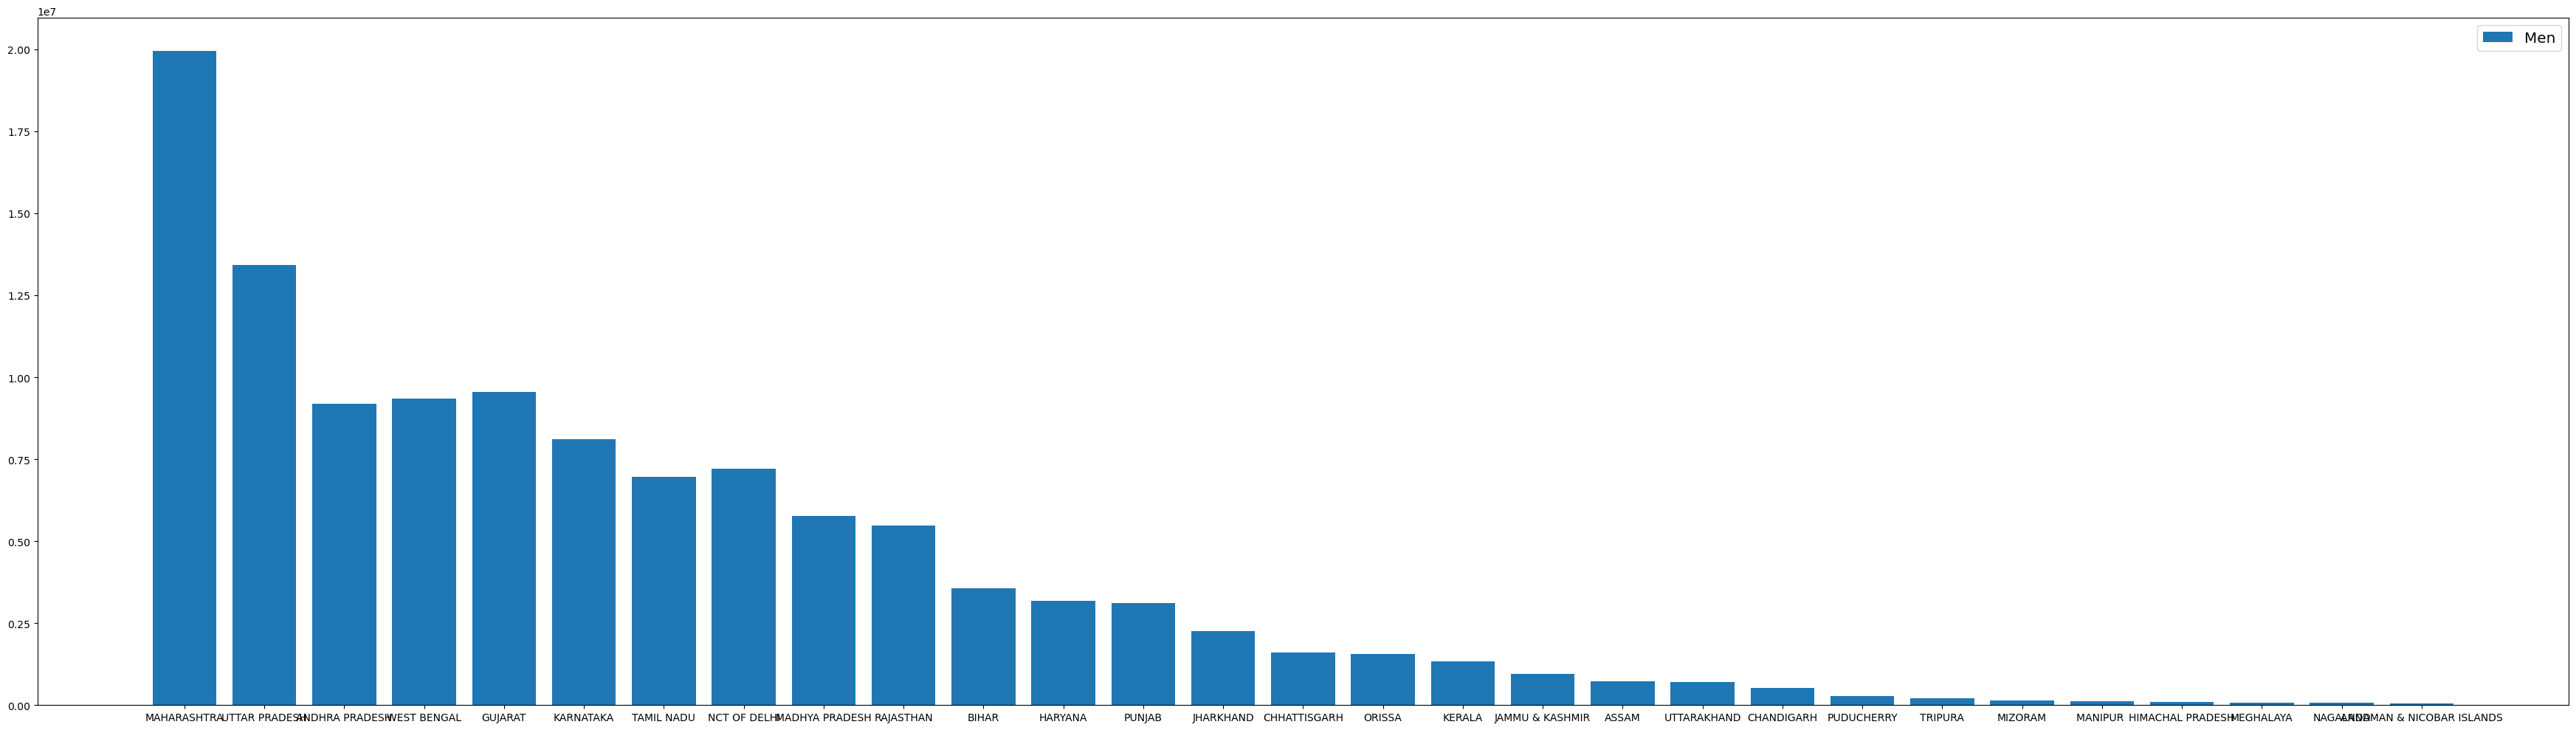

In [6]:
fig, ax = plt.subplots(figsize=(35, 10))
rects2 = ax.bar(df1.state_name ,df1['population_male'] , label='Men')
ax.legend(fontsize=40) 
ax.legend(fontsize="x-large")
fig.tight_layout()
plt.show()

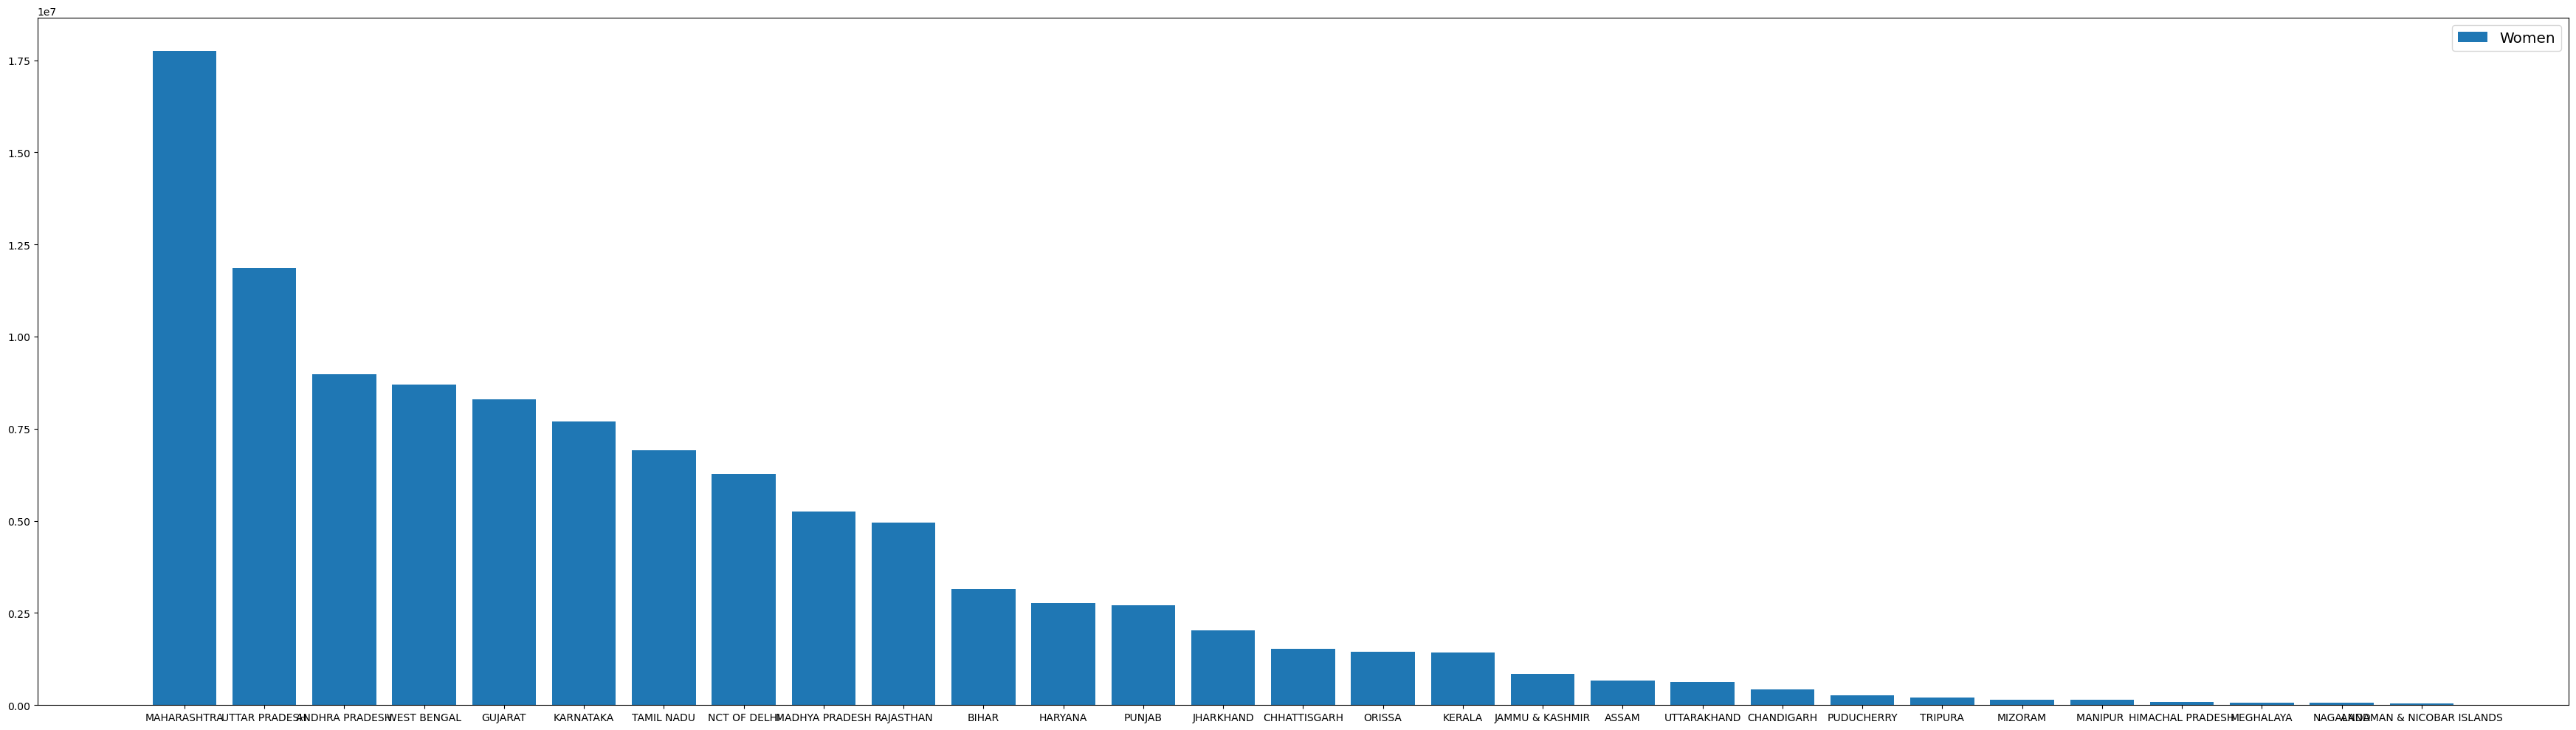

In [7]:
fig, ax = plt.subplots(figsize=(35, 10))
rects2 = ax.bar(df1.state_name ,df1['population_female'] , label='Women')
ax.legend(fontsize=40) 
ax.legend(fontsize="x-large")
fig.tight_layout()
plt.show()

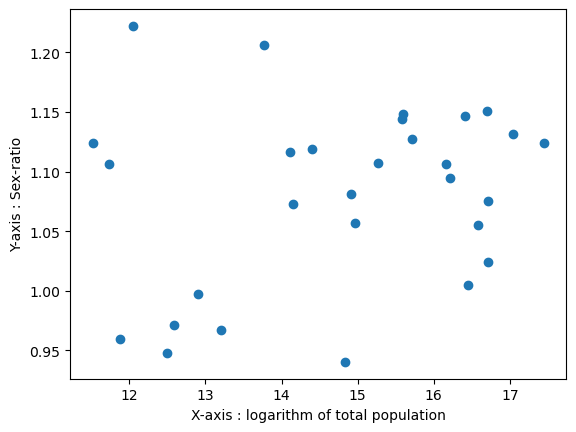

,state_name,population_total,population_male,population_female,sex_ratio,population_total_log
index,,,,,,
14,MAHARASHTRA,37722136,19961736,17760400,1.123946,17.445758
26,UTTAR PRADESH,25302925,13433369,11869556,1.131750,17.046431
1,ANDHRA PRADESH,18171615,9192368,8979247,1.023735,16.715371
28,WEST BENGAL,18063509,9357777,8705732,1.074898,16.709404
6,GUJARAT,17835049,9541688,8293361,1.150521,16.696676


In [8]:
L1=[]
sr = Decimal(0.00)
for i in range(max(df1.index)+1):
    sr = df1.iloc[i]['population_male']/df1.iloc[i]['population_female']
    L1.insert(i,sr)
df1['sex_ratio']=L1

# Applying log transformations
df1['population_total_log'] = np.log(df1['population_total'])
plt.scatter(df1['population_total_log'],df1['sex_ratio'])
plt.xlabel("X-axis : logarithm of total population")
plt.ylabel("Y-axis : Sex-ratio")
plt.show()
df1.head()

From the scatter plot we cannot determine any relationship between sex-ratio & population

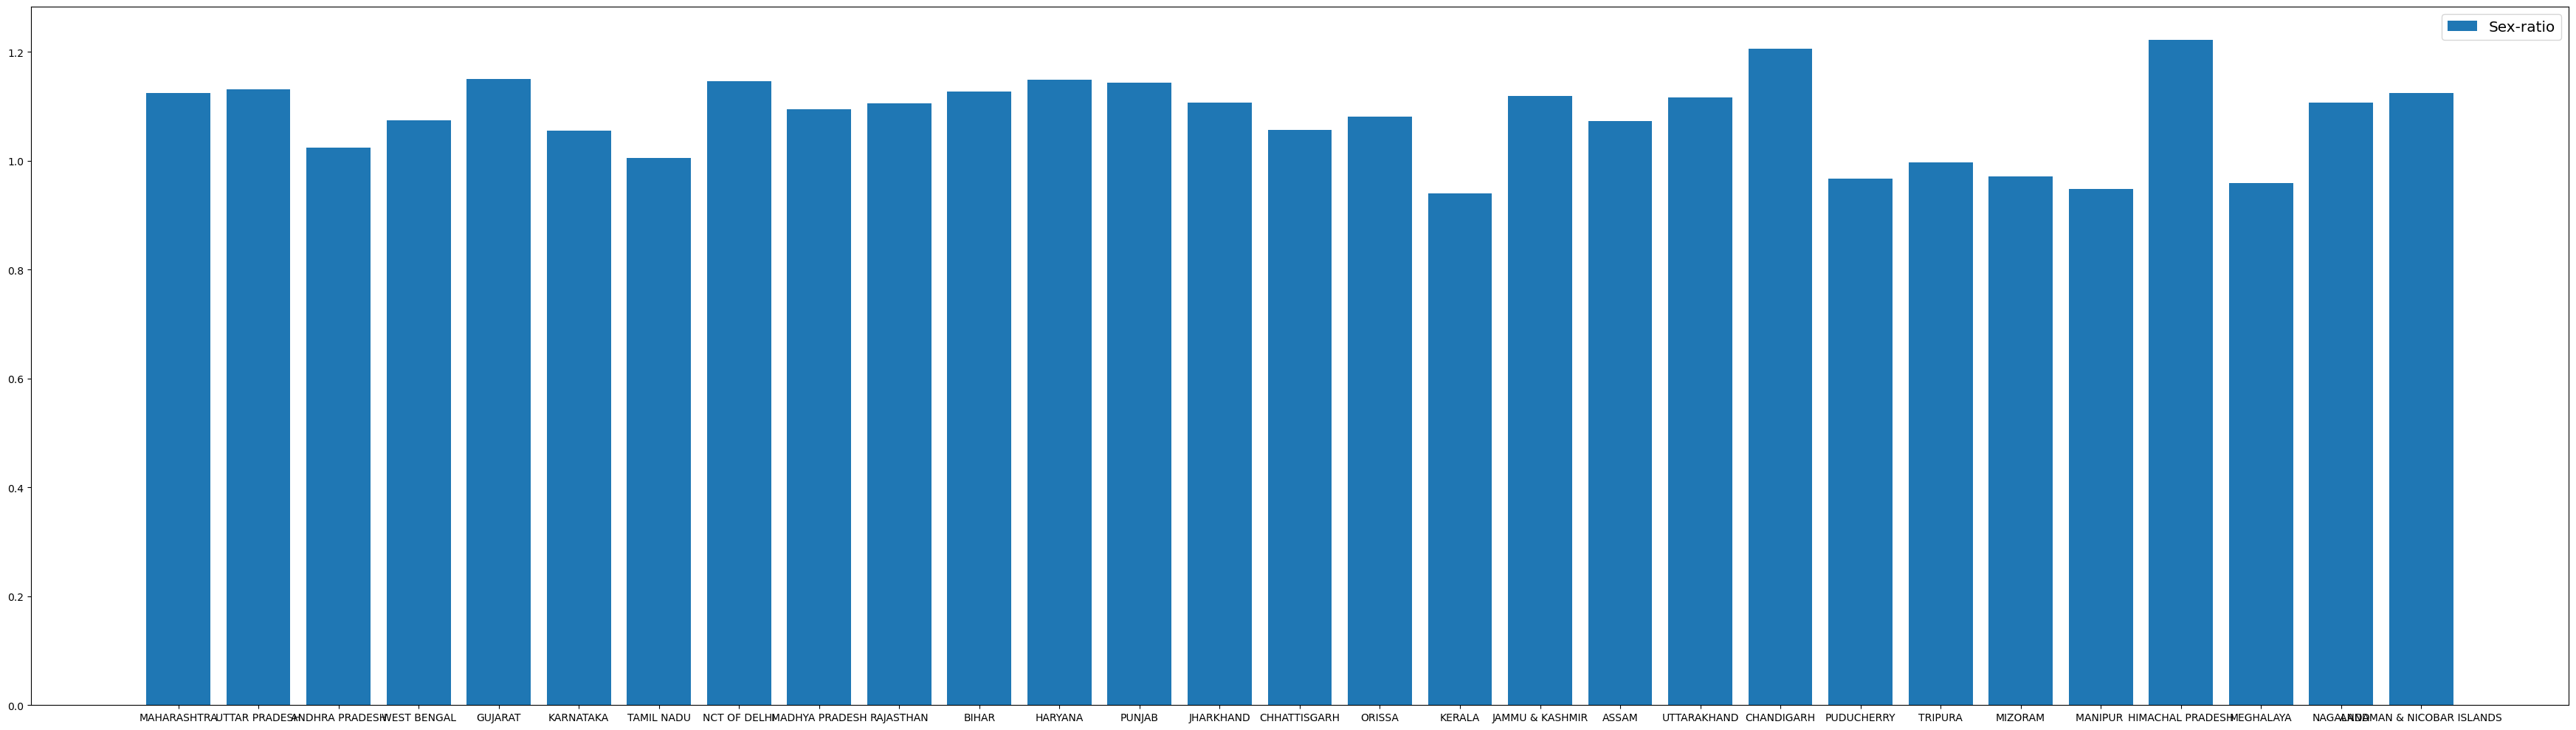

In [9]:
#Sex-ratio Distribution per state that is ratio of males to females
fig, ax = plt.subplots(figsize=(35, 10))
rect4 = ax.bar(df1.state_name ,df1['sex_ratio'] , label='Sex-ratio')
ax.legend(fontsize=40) 
ax.legend(fontsize="x-large")
fig.tight_layout()
plt.show()

From the above plot we can see most states have greater male population than that of females

Now to determine if & how child sex-ratio is interlinked with child-literacy rate , then we can say there if boy child or a girl child gets more priviledge to primary education in a state

In [10]:
df2 = df[['state_name','0-6_population_total', 
          '0-6_population_male','0-6_population_female','population_total']].groupby(["state_name"]).sum()
df2.head()

,0-6_population_total,0-6_population_male,0-6_population_female,population_total
state_name,,,,
ANDAMAN & NICOBAR ISLANDS,9358,4852,4506,100608
ANDHRA PRADESH,1776846,913593,863253,18171615
ASSAM,125523,62882,62641,1391154
BIHAR,881486,465151,416335,6714516
CHANDIGARH,104192,56020,48172,960787


In [11]:
df2['0-6_sex_ratio'] =  round(df2['0-6_population_male']/df2['0-6_population_female'],2)#ratio of male child to feamle child 
df2.head()

,0-6_population_total,0-6_population_male,0-6_population_female,population_total,0-6_sex_ratio
state_name,,,,,
ANDAMAN & NICOBAR ISLANDS,9358,4852,4506,100608,1.08
ANDHRA PRADESH,1776846,913593,863253,18171615,1.06
ASSAM,125523,62882,62641,1391154,1.00
BIHAR,881486,465151,416335,6714516,1.12
CHANDIGARH,104192,56020,48172,960787,1.16


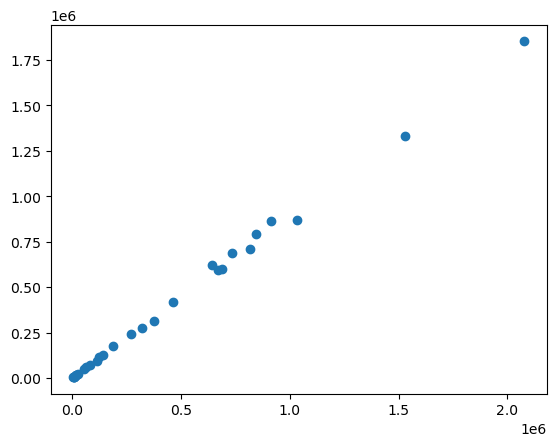

Mean =  1.1389285714285715
Median =  1.1
Mode =  1.12


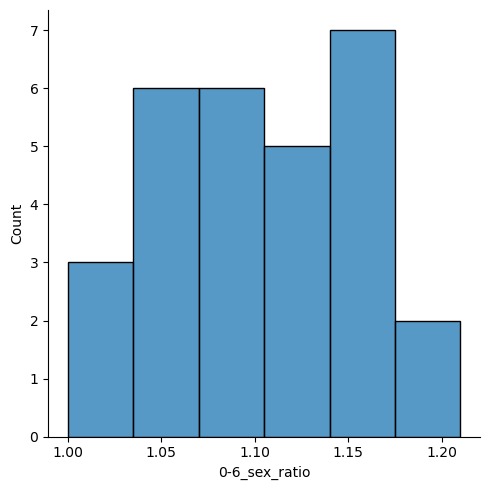

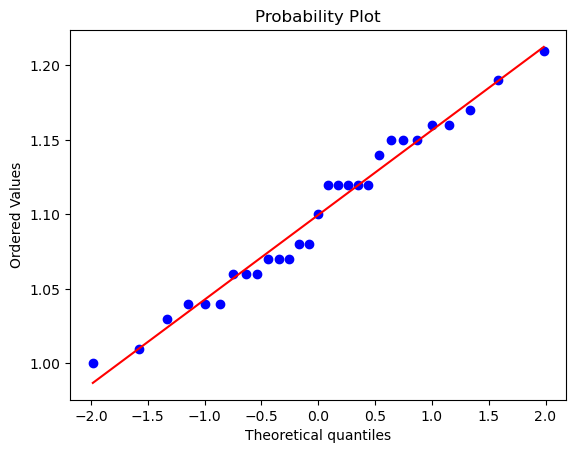

In [12]:
plt.scatter(df2['0-6_population_male'],df2['0-6_population_female'])
plt.show()
sns.displot(df2['0-6_sex_ratio'])
figure1 = plt.figure()
res = stats.probplot(df2['0-6_sex_ratio'],plot=plt)


print("Mean = ",sum(df2['0-6_sex_ratio'])/28)
print("Median = ",statistics.median(df2['0-6_sex_ratio']))
print("Mode = ",statistics.mode(df2['0-6_sex_ratio']))

Conclusions from the above scatterplot graph, Since the gradient or the slope of the graph is more than 1 we can say that for most states no.of boy child is more than that of girl child, and we can see that mean,median,mode  is somewhat be > 1.1

In [13]:
df3 = df[['state_name','dist_code','literates_total','literates_male','literates_female',
          'total_graduates','male_graduates','female_graduates','population_total']].groupby(["state_name","dist_code"]).sum()

df3['literacy_rate'] = round(df3['literates_total'] / df3['population_total'],2) #literacy rate as a whole

df3['literacy_rate_male/female'] = round(df3['literates_male'] / df3['literates_female'],2)

df3['graduates_male/female%'] = round(df3['male_graduates']/df3['female_graduates'],2)
df3.head()

literates_total  literates_male  \
state_name                dist_code                                    
ANDAMAN & NICOBAR ISLANDS 3                    81908           44908   
ANDHRA PRADESH            1                    83955           46295   
                          2                   221829          119603   
                          3                   365260          199868   
                          5                   170148           92956   

                                     literates_female  total_graduates  \
state_name                dist_code                                      
ANDAMAN & NICOBAR ISLANDS 3                     37000            12420   
ANDHRA PRADESH            1                     37660            10565   
                          2                    102226            34574   
                          3                    165392            79243   
                          5                     77192            42492   

                                     male_graduates  female_graduates  \
state_name                dist_code                                     
ANDAMAN & NICOBAR ISLANDS 3                    6717              5703   
ANDHRA PRADESH            1                    6797              3768   
                          2                   22062             12512   
                          3                   50458             28785   
                          5                   23836             18656   

                                     population_total  literacy_rate  \
state_name                dist_code                                    
ANDAMAN & NICOBAR ISLANDS 3                    100608           0.81   
ANDHRA PRADESH            1                    117388           0.72   
                          2                    310467           0.71   
                          3                    490531           0.74   
                          5                    213698           0.80   

                                     literacy_rate_male/female  \
state_name                dist_code                              
ANDAMAN & NICOBAR ISLANDS 3                               1.21   
ANDHRA PRADESH            1                               1.23   
                          2                               1.17   
                          3                               1.21   
                          5                               1.20   

                                     graduates_male/female%  
state_name                dist_code                          
ANDAMAN & NICOBAR ISLANDS 3                            1.18  
ANDHRA PRADESH            1                            1.80  
                          2                            1.76  
                          3                            1.75  
                          5                            1.28

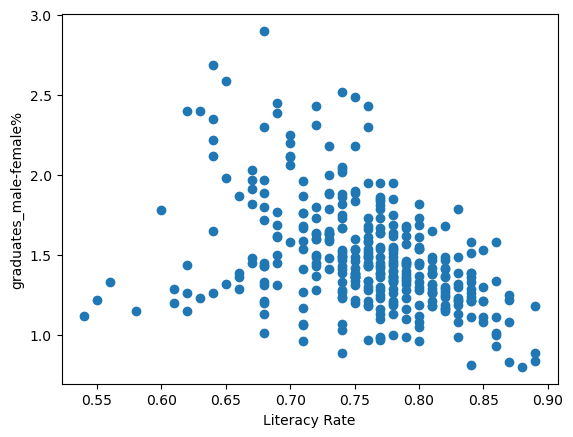

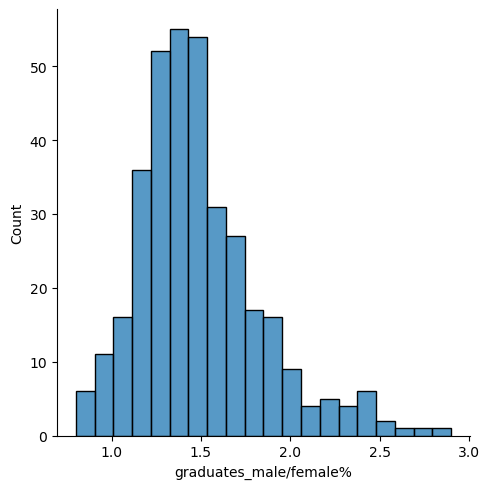

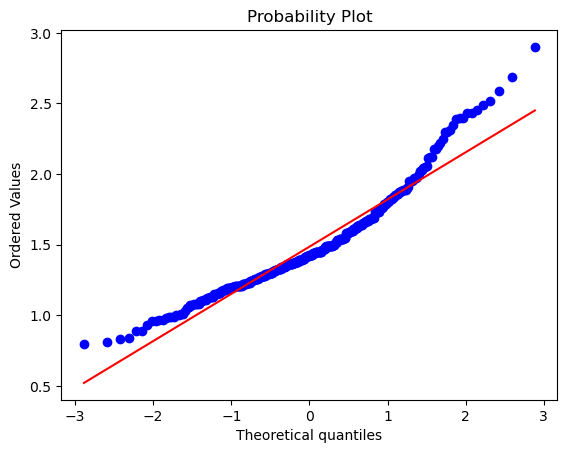

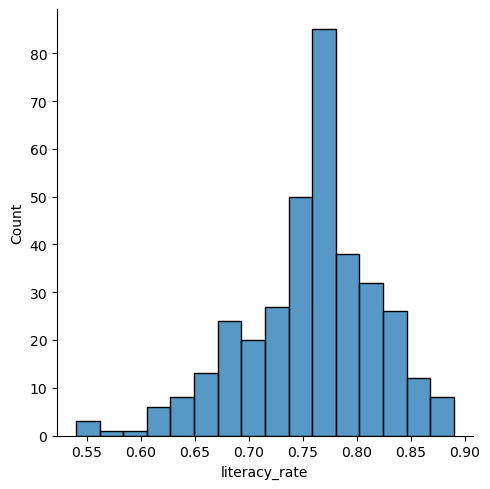

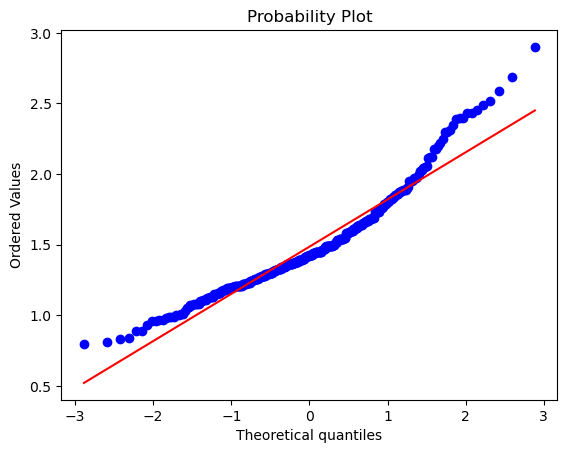

In [14]:
plt.scatter(df3['literacy_rate'],df3['graduates_male/female%'])
                                      #trying to find the correlation between graduates_male-female% & literacy rate
plt.xlabel("Literacy Rate")
plt.ylabel("graduates_male-female%")

df4 = df3[['graduates_male/female%','literacy_rate']]
df4.corr(method='pearson')

sns.displot(df3['graduates_male/female%'])
figure2 = plt.figure()
res = stats.probplot(df3['graduates_male/female%'],plot=plt)

sns.displot(df3['literacy_rate'])
figure2 = plt.figure()
res = stats.probplot(df3['graduates_male/female%'],plot=plt)

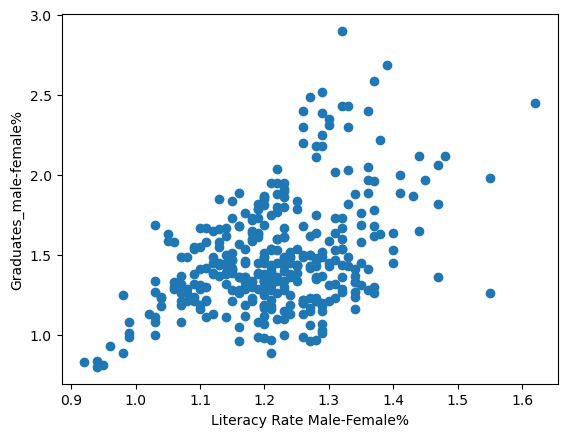

,graduates_male/female%,literacy_rate_male/female
graduates_male/female%,1.00000,0.44294
literacy_rate_male/female,0.44294,1.00000


In [15]:
#Trying to plot male-vs-female graduates wrt male-vs-female literacy rate
plt.scatter(df3['literacy_rate_male/female'],df3['graduates_male/female%'])
plt.xlabel("Literacy Rate Male-Female%")
plt.ylabel("Graduates_male-female%")
plt.show()

df4 = df3[['graduates_male/female%','literacy_rate_male/female']]
df4.corr(method='pearson')


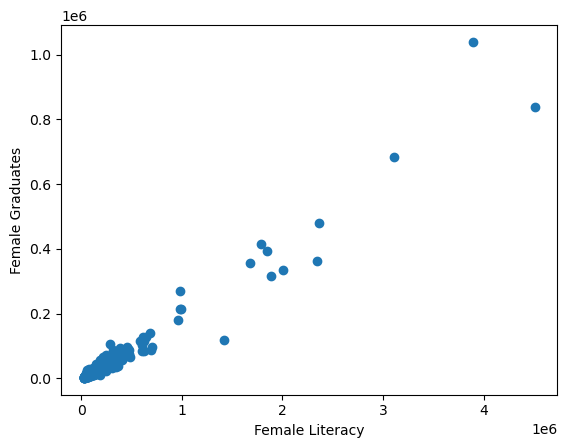

,literates_female,female_graduates
literates_female,1.00000,0.97582
female_graduates,0.97582,1.00000


In [16]:
#Trying to plot male-vs-female graduates wrt male-vs-female literacy rate
plt.scatter(df3['literates_female'],df3['female_graduates'])
plt.xlabel("Female Literacy")
plt.ylabel("Female Graduates")
plt.show()

df4 = df3[['literates_female','female_graduates']]
df4.corr(method='pearson')

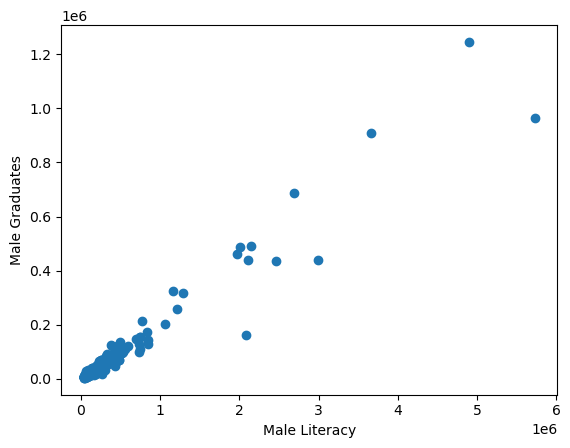

,literates_male,male_graduates
literates_male,1.000000,0.969179
male_graduates,0.969179,1.000000


In [17]:
#Trying to plot male-vs-female graduates wrt male-vs-female literacy rate
plt.scatter(df3['literates_male'],df3['male_graduates'])
plt.xlabel("Male Literacy")
plt.ylabel("Male Graduates")
plt.show()

df4 = df3[['literates_male','male_graduates']]
df4.corr(method='pearson')

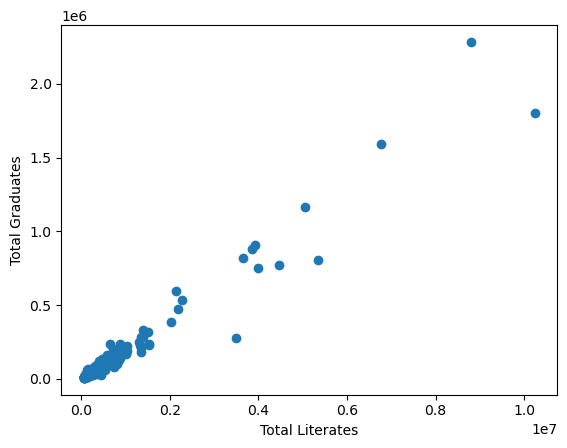

,literates_total,total_graduates
literates_total,1.000000,0.974192
total_graduates,0.974192,1.000000


In [18]:
#Trying to plot male-vs-female graduates wrt male-vs-female literacy rate
plt.scatter(df3['literates_total'],df3['total_graduates'])
plt.xlabel("Total Literates")
plt.ylabel("Total Graduates")
plt.show()

df4 = df3[['literates_total','total_graduates']]
df4.corr(method='pearson')

Conclusion from this is that when literacy is greater than 70 percent then numbers of females graduating is also increasing
Also from the normal distribution, of male-to-female_graduates% , we can see it is right-skewed 
Also from the normal distribution, of literacy_rate% , we can see it is a bit-skewed , so literacy rate increases with decrease in male-to-female_graduates%, that is increase in count of females in graduation.

State-wise, Also we can say that correlation of women literates & women graduaduates is slightly more than that of males, given a chance of education , women tend to complete the graduation more than men completing graduation

If, literates increase, chances of graduates will also increase.


In [19]:
df4 = df[['state_name','literates_total',
'total_graduates','male_graduates','female_graduates']].groupby(["state_name"]).sum().reset_index().sort_values(['total_graduates'], ascending=False)
print("State which has the highest graduates", df4.iloc[0]["state_name"])
df5 = df[['state_name','literates_total',
'total_graduates','male_graduates','female_graduates']].groupby(["state_name"]).sum().reset_index().sort_values(['literates_total'], ascending=False)
print("State which has the highest literates", df4.iloc[0]["state_name"])

State which has the highest graduates MAHARASHTRA
State which has the highest literates MAHARASHTRA


So, we can conclude that the state of Maharashtra might have best educational infrastructure like more number of schools and colleges than most states